# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
##### image distribution analysis

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness_camera_images(img)

    return img


In [2]:
from sklearn import preprocessing

def normalizeImage(img):
    out_min = 0.1
    out_max = 0.9
    greyscale_min = 0
    greyscale_max = 255
    
    slope = (out_max - out_min)/( greyscale_max - greyscale_min )
    b = out_min
    return slope * (img - greyscale_min) + out_min

def preprocessImage(img):
    # gray scale image
    normalizedImg = np.zeros((32, 32))
    normalizedImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # normalize the image
    return normalizeImage(normalizedImg)
    

In [3]:
# Load pickled data
import pickle
import cv2
import numpy as np
import math

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/Users/vijay/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p"
testing_file = "/Users/vijay/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# counter = 0
# labelToImage = {}

# for img in train['features']:
#     if (train['labels'][counter] in labelToImage):
#         labelToImage[train['labels'][counter]] += [img]
#     else:
#         labelToImage[train['labels'][counter]] = [img]
#     counter += 1
    
### Equalize distributions
# distributions = np.bincount(train['labels'])
# maxVal = max(distributions)
# tempFeatures = list(train['features'])
# tempLabels = train['labels']
# print(type(test['features']))
# print(type(train['labels'][10]))
# print(train['labels'][10])


# for index in range(0, len(distributions)):
#     numPerImage = math.floor(maxVal/distributions[index])
#     if (numPerImage > 1):
#         for img in labelToImage[index]:
#             for i in range(0, numPerImage):
#                 transformedImg = transform_image(img, 20, 10, 5, brightness=1)
#                 tempFeatures += [transformedImg]
#                 train['labels'] = np.append(train['labels'], [np.uint8(index)])

y_train = train['labels']
y_test = test['labels']
X_train = []
X_test = []

print(len(train['features']))
print(len(train['labels']))

for img in train['features']:
    X_train += [preprocessImage(img)]
    
for img in test['features']:
    X_test += [preprocessImage(img)]
    


39209
39209


In [4]:
print(X_train[0].shape)
print(len(X_train))
print(len(y_train))

(32, 32)
39209
39209


In [5]:
print(type(y_train[1]))

<class 'numpy.uint8'>


In [6]:
print(len(set(y_train)))
print(X_train[1])
print(train['features'][0].shape)
print(cv2.cvtColor(train['features'][0], cv2.COLOR_BGR2GRAY))

43
[[ 0.32901961  0.34470588  0.34156863 ...,  0.34784314  0.33529412
   0.31333333]
 [ 0.31647059  0.33843137  0.3572549  ...,  0.36352941  0.34784314
   0.31960784]
 [ 0.31019608  0.32588235  0.34470588 ...,  0.37294118  0.33529412
   0.31960784]
 ..., 
 [ 0.52666667  0.52666667  0.52352941 ...,  0.34470588  0.3572549
   0.38862745]
 [ 0.41372549  0.41686275  0.41058824 ...,  0.36039216  0.39803922
   0.43254902]
 [ 0.33215686  0.3572549   0.38862745 ...,  0.34470588  0.42        0.41686275]]
(32, 32, 3)
[[ 78  76  84 ...,  73  68  67]
 [ 83  81  85 ...,  77  76  78]
 [ 80  84  89 ...,  73  74  77]
 ..., 
 [129 124 117 ...,  94  99 101]
 [ 95  98  87 ..., 102 108 100]
 [ 85 100  80 ...,  99  97  94]]


In [7]:
print(y_train)

print(min(np.bincount(y_train)))
max(np.bincount(y_train))

[ 0  0  0 ..., 42 42 42]
210


2250

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [8]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = 39209

# TODO: Number of testing examples.
n_test = 12630

# TODO: What's the shape of an traffic sign image?
image_shape = [32, 32, 3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

(32, 32)


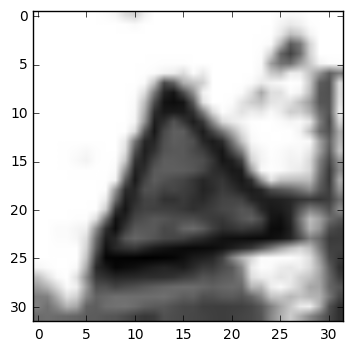

In [9]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import cv2

index = random.randint(0, len(X_train))

# Visualizations will be shown in the notebook.
%matplotlib inline


# fig = plt.figure()
# a=fig.add_subplot(1,2,1)

print(X_train[index].shape)
#print(cv2.cvtColor(X_train[index], cv2.COLOR_BGR2GRAY).shape)
#plt.imshow(cv2.cvtColor(X_train[index], cv2.COLOR_BGR2GRAY), cmap='gray')
#a=fig.add_subplot(1,2,2)

plt.imshow(X_train[index], cmap='gray')


#plt.imshow(X_train[index])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import cv2
import numpy as np

EPOCHS = 30
BATCH_SIZE = 128

layer_width = {
    'layer_1': 6,
    'layer_2': 16
}

weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']], mean=0, stddev=0.1)),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']], mean=0, stddev=0.1))
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
}

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
X_train, y_train = shuffle(X_train, y_train)

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.
    
    x = tf.reshape(x, (-1, 32, 32, 1))
        
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    x = tf.nn.conv2d(x, weights["layer_1"], [1, 1, 1, 1], 'VALID') + biases["layer_1"]

    # TODO: Activation.
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    x = tf.nn.conv2d(x, weights["layer_2"], [1, 1, 1, 1], 'VALID') + biases["layer_2"]    
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    x = flatten(x)
    fc1_shape = (x.get_shape().as_list()[-1], 120)

    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1_shape), mean = 0.0, stddev = 0.1))
    fc1_b = tf.Variable(tf.zeros(120))
    x = tf.matmul(x, fc1_W) + fc1_b
    #x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = 0.0, stddev = 0.1))
    fc2_b  = tf.Variable(tf.zeros(84))
    x = tf.matmul(x, fc2_W) + fc2_b

    
    # TODO: Activation.
    x = tf.nn.relu(x)
    x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = 0.0, stddev = 0.1))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(x, fc3_W) + fc3_b
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

logits = LeNet(x)
loss_operation = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
optimizer = tf.train.AdamOptimizer()
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data, keep_prob_in):
    num_examples = len(X_data)
    total_accuracy, total_loss = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BA1/43TCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        batch_x = np.reshape(batch_x, (-1, 32, 32, 1))
        loss, accuracy =  sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_in})
        total_accuracy += (accuracy * batch_x.shape[0])
        total_loss     += (loss * batch_x.shape[0])
    return total_loss / num_examples, total_accuracy / num_examples

    

In [11]:
new_graph = tf.Graph()
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            batch_x = np.reshape(batch_x, (-1, 32, 32, 1))
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})
            
        validation_loss, validation_accuracy = evaluate(X_validation, y_validation, 0.8)
        print("EPOCH {} ...".format(i+1))
        print("Validation Loss     = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet_dropout_5')
    print("Model saved")

Training...
EPOCH 1 ...
Validation Loss     = 1.650
Validation Accuracy = 0.508

EPOCH 2 ...
Validation Loss     = 0.975
Validation Accuracy = 0.700

EPOCH 3 ...
Validation Loss     = 0.719
Validation Accuracy = 0.775

EPOCH 4 ...
Validation Loss     = 0.592
Validation Accuracy = 0.816

EPOCH 5 ...
Validation Loss     = 0.482
Validation Accuracy = 0.850

EPOCH 6 ...
Validation Loss     = 0.430
Validation Accuracy = 0.870

EPOCH 7 ...
Validation Loss     = 0.364
Validation Accuracy = 0.886

EPOCH 8 ...
Validation Loss     = 0.337
Validation Accuracy = 0.893

EPOCH 9 ...
Validation Loss     = 0.308
Validation Accuracy = 0.907

EPOCH 10 ...
Validation Loss     = 0.296
Validation Accuracy = 0.910

EPOCH 11 ...
Validation Loss     = 0.262
Validation Accuracy = 0.921

EPOCH 12 ...
Validation Loss     = 0.261
Validation Accuracy = 0.921

EPOCH 13 ...
Validation Loss     = 0.245
Validation Accuracy = 0.926

EPOCH 14 ...
Validation Loss     = 0.235
Validation Accuracy = 0.933

EPOCH 15 ...
Vali

In [12]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet_dropout_5.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_loss, test_accuracy = evaluate(X_test, y_test, 1.0)
    print("Test Loss     = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Loss     = 0.282
Test Accuracy = 0.938


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [13]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

a) Grayscaling images: Grayscaling the image helped improve accuracy 
b) Normalizing the images: I normalized the grayscaled image using min-max scaling. This also helped with accuracy
c) One hot encoding: The labels were one hot encoded since we dont want any order preferance

SyntaxError: invalid syntax (<ipython-input-13-f9e4b54a1795>, line 5)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

I split the training set such that there is 33% of the proportion in the validation set and the rest 
in the training set. 75% of all the data is in the training set while 25% is in the test set.

I generated additional data since the proportion of test data for each class was uneven. I used a code
sample from this project (https://github.com/vxy10/ImageAugmentation) to get transformed images of the 
uneven classes to equalize the distributions.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

The model and its implementation are a few code cells up.


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the adam optimizer to train the model. I used an epoch size of 30 (since I could not get EC2 GPU to work) and
a batch size of 128. I used mu=0, sigma=0.1 for the random distrbution of weight values.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I used LeNet architecture as the starting point for this analysis. I did this because LeNet is a great conv net for generic image recognition and since traffic sign classification is a subset of image recognition, it made sense to use and modify this algorithm.

The approach I took was as follows:
1) Run on generic LeNet and see the final accuracy on the training data
2) Do some preprocessing on the image using grayscale and normalization to see if the accuracy improves
3) Change hyper-parameters in the architecture and see if the accuracy increases
4) Prevent overfitting by adding L2 Regularization and dropout. See if the results improve.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



(288, 360, 3)
(32, 32)


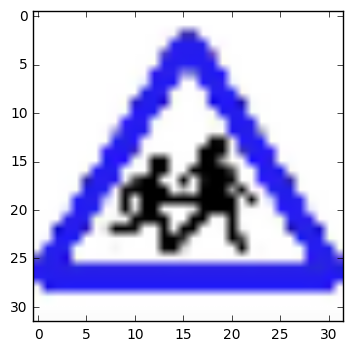

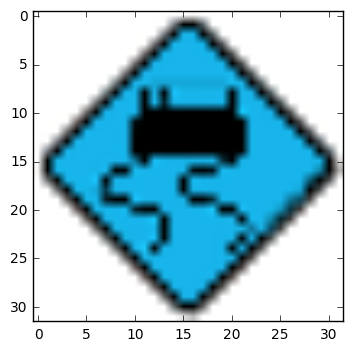

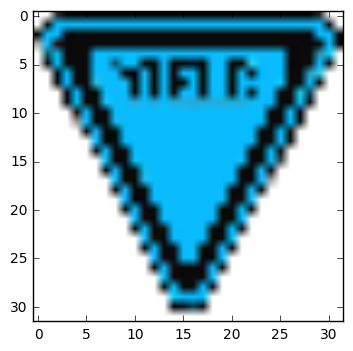

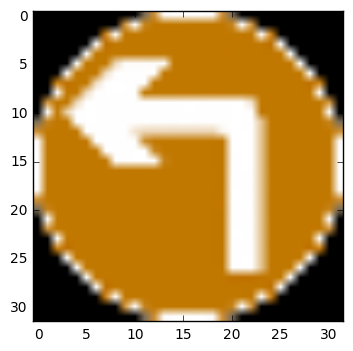

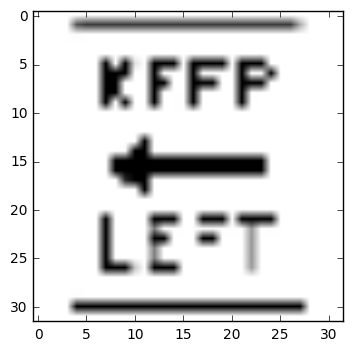

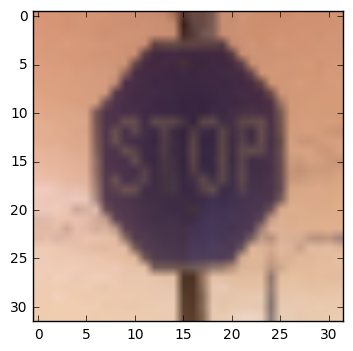

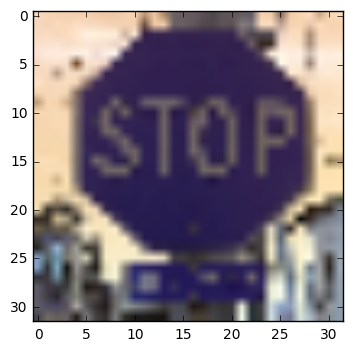

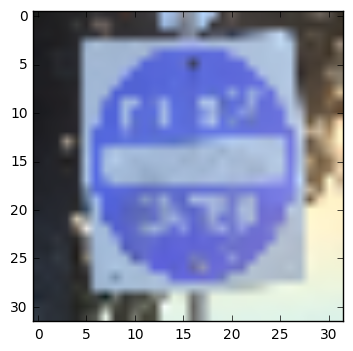

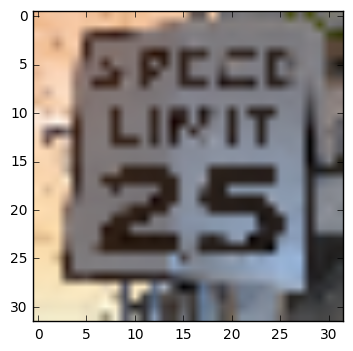

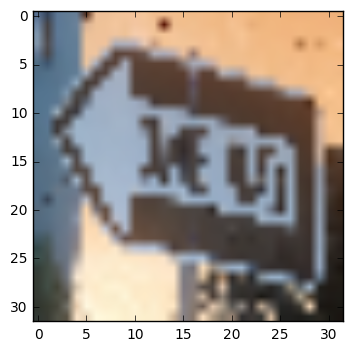

In [52]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

img1 = cv2.imread('/Users/vijay/CarND-Traffic-Sign-Classifier-Project/children_crossing.jpg', 1)
img2 = cv2.imread('/Users/vijay/CarND-Traffic-Sign-Classifier-Project/slippery.jpg', 1)
img3 = cv2.imread('/Users/vijay/CarND-Traffic-Sign-Classifier-Project/yeild.jpeg', 1)
img4 = cv2.imread('/Users/vijay/CarND-Traffic-Sign-Classifier-Project/turn-left-ahead.png',1)
img5 = cv2.imread('/Users/vijay/CarND-Traffic-Sign-Classifier-Project/keep-left.jpg',1)
img6 = cv2.imread('/Users/vijay/CarND-Traffic-Sign-Classifier-Project/real_images/stop-sign.png',1)
img8 = cv2.imread('/Users/vijay/CarND-Traffic-Sign-Classifier-Project/real_images/one-way.png',1)
img9 = cv2.imread('/Users/vijay/CarND-Traffic-Sign-Classifier-Project/real_images/stop-2.png',1)
img10 = cv2.imread('/Users/vijay/CarND-Traffic-Sign-Classifier-Project/real_images/do-not-enter.png',1)

img1 = cv2.resize(img1,(32, 32), interpolation = cv2.INTER_CUBIC)
img2 = cv2.resize(img2,(32, 32), interpolation = cv2.INTER_CUBIC)
img3 = cv2.resize(img3,(32, 32), interpolation = cv2.INTER_CUBIC)
img4 = cv2.resize(img4,(32, 32), interpolation = cv2.INTER_CUBIC)
img5 = cv2.resize(img5,(32, 32), interpolation = cv2.INTER_CUBIC)
img6 = cv2.resize(img6,(32, 32), interpolation = cv2.INTER_CUBIC)
img8 = cv2.resize(img8,(32, 32), interpolation = cv2.INTER_CUBIC)
img9 = cv2.resize(img9,(32, 32), interpolation = cv2.INTER_CUBIC)
img10 = cv2.resize(img10,(32, 32), interpolation = cv2.INTER_CUBIC)

imgs = [img1,img2,img3,img4,img5,img6,img8,img9,img10]

labels = [28, 23, 13, 34, 39, 14, 35, 14, 17]

features = []

for img in imgs:
    fig = plt.figure()
    plt.imshow(img)

for img in imgs:
    features += [preprocessImage(img)]
    
print(features[0].shape)

**Answer:**

In [57]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet_dropout_5.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    batch_x = np.reshape(features, (-1, 32, 32, 1))
    results = sess.run([tf.argmax(logits, 1)], feed_dict={x: batch_x, y: labels, keep_prob: 1.0})
    test_loss, test_accuracy = evaluate(batch_x, labels, 1.0)
    print("Test Loss     = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print(results)


Test Loss     = 11.856
Test Accuracy = 0.444
[array([28, 17, 13, 34,  9, 34, 14, 13, 17])]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

The acccuracy on the real world data was 44.4%, which is much less than the test accuracy of 93.8%. 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [59]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet_dropout_5.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    batch_x = np.reshape(features, (-1, 32, 32, 1))
    results = sess.run([tf.nn.top_k(logits, k=5)], feed_dict={x: batch_x, y: labels, keep_prob: 1.0})
    print(results)

[TopKV2(values=array([[  1.02166462e+01,   8.25823975e+00,   4.63618755e+00,
          3.36482573e+00,   2.78198051e+00],
       [  1.01711950e+01,   6.40543699e+00,   3.76153541e+00,
          2.39246082e+00,   3.77924711e-01],
       [  6.43589554e+01,   1.93739319e+01,   1.73502655e+01,
          1.90951359e+00,  -7.34469652e-01],
       [  5.69957304e+00,   3.10064173e+00,   1.68928790e+00,
          9.53321993e-01,   9.40654933e-01],
       [  2.43665314e+01,   1.24068136e+01,   1.21006155e+01,
          8.95159245e+00,   8.23418522e+00],
       [  5.19274569e+00,   4.92745209e+00,   3.80781674e+00,
          3.21192908e+00,   2.17358112e+00],
       [  4.59374285e+00,   1.40884864e+00,   3.98527533e-01,
          4.32494283e-03,  -3.02044272e-01],
       [  1.75415885e+00,   1.66882908e+00,   8.92287195e-01,
          5.68048477e-01,  -2.27662563e-01],
       [  9.07091236e+00,   5.92206192e+00,   3.87582636e+00,
          3.73462701e+00,   3.09555697e+00]], dtype=float32), indic

In [ ]:
It seems that for the stop signs that were incorrectly classified, the top 3 softmax values did not include the 
stop signs, which is unfortunate (however for k=5, one of the top 5 has the stop sign in it!). Moreover, the slippery 
when wet sign also did not have the correct sign in thetop 3. For the correct classifications, the correct 
classifications had a significantly higher probability than the other outputs, which is good.